In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

In [2]:
x_data = np.linspace(-2,2,200)[:,np.newaxis]#把行变为列
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise

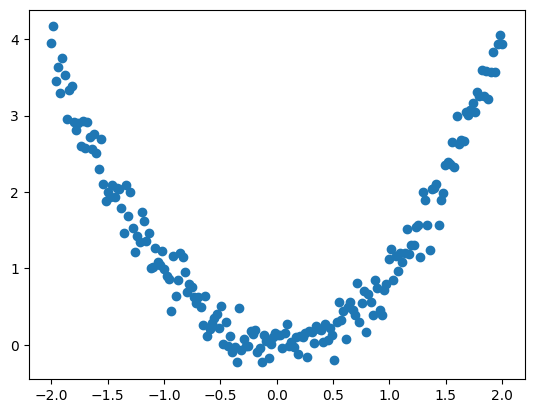

In [3]:
plt.scatter(x_data,y_data)
plt.show()

In [4]:
x_data = x_data.reshape(-1,1) #一列 前面已经变了 这里可写可不写
y_data = y_data.reshape(-1,1)

In [5]:
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [6]:
# 构建神经网络模型
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.fc1 = nn.Linear(1,10)# 10个神经元
        self.tanh = nn.Tanh()# 激活函数
        self.fc2 = nn.Linear(10,1)
        
    # 定义网络计算
    def forward(self,x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [7]:
#定义模型
model = LinearRegression()
#定义代价函数
mes_loss = nn.MSELoss()
#定义优化器
optimizer = optim.SGD(model.parameters(),lr=0.3)#0.3是学习率


In [8]:
#训练模型
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mes_loss(out,target)
    # 梯度清零
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()

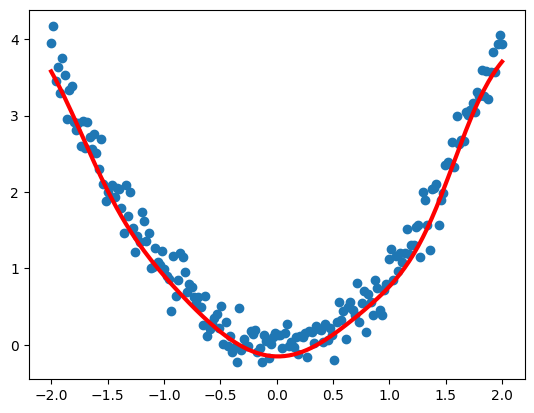

In [9]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()